# EXPLORATORY DATA ANALYSIS

This notebook will be focused on Exploratory Data Analysis task, using dataset containing information about universities, their applications and admissions. I will clean data, take interesting columns, and try to draw conclusions from data.

Этот ноутбук будет посвящен bсследовательскому анализу данных с использованием датасета, содержащего информацию об университетах, их заявлениях и приеме. Задача будет в очистке данных, отборе интересных данных, преобразование данных и выдвижение предположений отностительно показателей.

Import all needed modules

Импорт модулей для работы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Some plotting and display settings

Настройки отображения графиков и таблиц

In [53]:
pd.options.display.max_columns = None

sns.set_style("whitegrid")
plt.style.use("bmh")
mpl.rcParams['figure.facecolor']='whitesmoke'
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Let's import dataset

Импорт таблицы

In [4]:
unis_df = pd.read_excel('IPEDS_data.xlsx')

In [5]:
unis_df

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

Let's see if we need data cleaning. First, check for NA values.

Проверим нужна ли очистка данных. Сперва проверим датасет на присутствие NA значений.

In [6]:
unis_df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [7]:
perc_nan = unis_df.isna().sum()/len(unis_df)*100

Text(0, 0.5, '% of NaN elements')

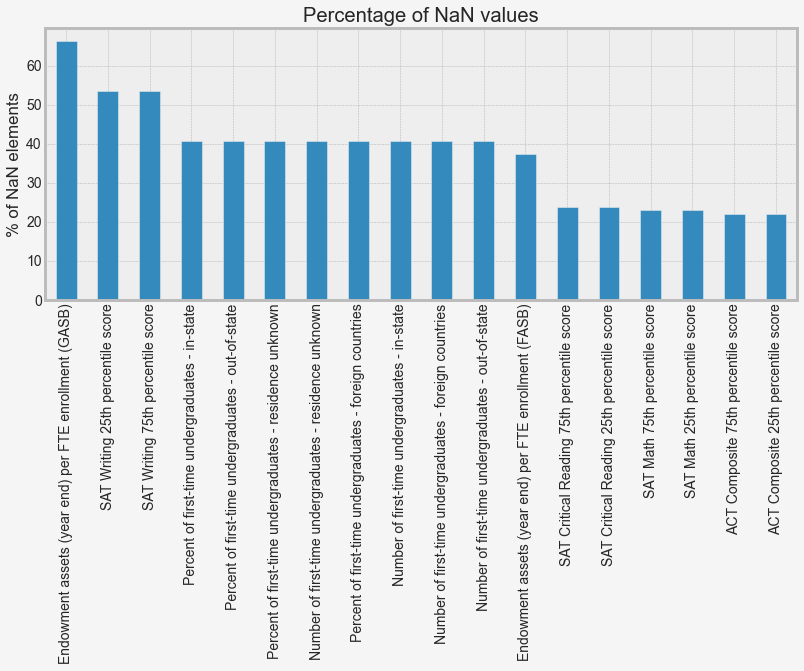

In [54]:
axs = perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values', figsize=(12,5))
axs.set_ylabel('% of NaN elements')
plt.show()

Some of columns contain more than 20% of missing values. Those columns will be kicked out.

Некоторые столбцы содержат более 20% пропущенных значений. Эти столбцы будут удалены. 

In [10]:
kick_out = unis_df.isna().sum()[unis_df.isna().sum()>=(0.2*len(unis_df))]
list_kick_out = kick_out.index.to_list()

In [11]:
unis_df_copy = unis_df.copy()
unis_df_copy.drop(list_kick_out, axis=1,inplace=True)

In [12]:
unis_df_copy

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergra

Now from the rest of the columns let's only keep those interesting for analysis.

Теперь из оставшихся столбцов оставим только те, которые интересны для анализа.

In [17]:
cols_interest = ['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [18]:
unis_df_copy = unis_df_copy[cols_interest]

In [19]:
unis_df_copy.head()

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.00,5521.00,1104.00,5024.00,7182.00,21849.00,27441.00,Alabama,Public,4439.00,581.00,4051.00,969.00,3799.00,252.00,55.00,51.00,69.00,10.00,23.00,29.00
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.00,4934.00,1773.00,18568.00,7206.00,22495.00,31687.00,Alabama,Public,11961.00,6607.00,11502.00,7066.00,8357.00,3145.00,61.00,58.00,64.00,29.00,46.00,53.00
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,626.00,6870.00,NaN,NaN,Alabama,Private not-for-profit,323.00,308.00,322.00,309.00,202.00,120.00,58.00,61.00,55.00,0.00,0.00,67.00
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.00,1656.00,651.00,7376.00,9192.00,23466.00,35780.00,Alabama,Public,4802.00,2574.00,5696.00,1680.00,4237.00,1459.00,44.00,44.00,43.00,16.00,37.00,48.00
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.00,5251.00,1479.00,6076.00,8720.00,18286.00,25222.00,Alabama,Public,5182.00,893.00,5356.00,719.00,4872.00,484.00,61.00,59.00,71.00,9.00,19.00,25.00


Let's check the shape of our new dataset and compare it to previous one.

Проверим форму нашего нового набора данных и сравним его с предыдущим

In [23]:
print('The data frame now has {} columns out of the {} original columns, and {} rows out of the {} original rows.'.format(unis_df_copy.shape[1],unis_df.shape[1],unis_df_copy.shape[0],unis_df.shape[0]))

The data frame now has 28 columns out of the 145 original columns, and 1534 rows out of the 1534 original rows.


Okay, dataset is way easier to operate now. Let's next check for negative values, since we should not have those in this dataset.

Хорошо, работать с датасетом станет намного проще. Давайте теперь проверим отрицательные значения, так как у нас не должно быть их в этом наборе данных. 

In [25]:
cols=unis_df_copy.select_dtypes(include=['float64','int64']).columns

In [26]:
lt=list()
for i in cols:
    y=any(x < 0 for x in unis_df_copy[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


Great, no negative values. Now let's look at summary table.

Отлично, никаких отрицательных значений. Теперь посмотрим на сводную таблицу. 

In [28]:
unis_df_copy.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1534.00,1377.00,1377.00,1377.00,1532.00,1497.00,1400.00,1400.00,1532.00,1532.00,1532.00,1532.00,1532.00,1532.00,1532.00,1522.00,1269.00,1476.00,1476.00,1476.00
mean,2013.00,6391.19,3554.88,1043.05,7033.12,20727.49,34935.31,38767.61,5371.49,1698.62,5532.89,1537.23,4507.74,1025.15,57.91,57.17,63.11,37.45,49.79,53.19
std,0.00,8787.47,4309.46,1285.17,9387.65,12455.81,13283.05,10716.52,7474.49,2922.06,7242.65,2765.20,6042.19,2121.50,11.78,11.89,14.15,21.95,20.26,19.10
min,2013.00,0.00,0.00,0.00,68.00,1032.00,9768.00,9768.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2013.00,1488.00,950.00,287.00,1497.25,8542.00,22487.00,31128.00,1199.00,167.00,1328.00,46.75,1089.50,87.00,52.00,52.00,55.00,20.00,36.00,40.00
50%,2013.00,3350.00,2056.00,538.00,3126.00,20060.00,34115.00,37193.50,2328.00,671.00,2487.50,471.00,2066.00,320.50,58.00,57.00,64.00,34.00,49.00,52.50
75%,2013.00,7016.00,4203.00,1246.00,8376.00,29992.00,44835.75,45907.50,6080.75,2062.50,6394.00,1737.00,5207.50,1082.25,63.00,62.00,72.00,52.25,63.00,66.00
max,2013.00,72676.00,35815.00,10241.00,79576.00,49138.00,64988.00,64988.00,50012.00,40985.00,51333.00,29874.00,40020.00,37440.00,100.00,100.00,100.00,100.00,100.00,100.00


There are some zeros in minimum row in several columns. That shouldn't really be in this dataset, so let's count how many zeros we have and try to change them for something more operational.

В минимальной строке в нескольких столбцах есть нули. На самом деле этого не должно быть в этом наборе данных, поэтому давайте посчитаем, сколько у нас нулей, и попробуем изменить их на что-то более функциональное. 

In [29]:
zeros = (unis_df_copy[unis_df_copy.loc[0:]==0]).count().sum()

In [30]:
print('This data set contains {} zero values.'.format(zeros))

This data set contains 395 zero values.


In [31]:
unis_df_copy.replace(0, np.nan, inplace=True)

E:\anaconda2\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Okay, now I'm going to change columns headers, so they are all written in the same way.

Хорошо, теперь я собираюсь изменить заголовки столбцов, чтобы они все были написаны одинаково. 

In [33]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [34]:
def remove_sp_char(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            
            header=header   
        new_headers.append(header)
    return new_headers    

In [35]:
headers=remove_space(unis_df_copy.columns,[' - ',' '])

In [36]:
headers=remove_sp_char(headers,["'",',',':','-','/'])

In [37]:
list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed.
    
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

In [38]:
unis_df_copy.columns =list_new_header
unis_df_copy.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'full_time_enrollment',
       'part_time_enrollment', 'undergraduate_enrollment',
       'graduate_enrollment', 'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       'graduation_rate_bachelor_deg

In [39]:
unis_df_copy.rename(columns={'state_abbreviation':'state'}, inplace=True)

E:\anaconda2\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [40]:
unis_df_copy.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1534.00,1376.00,1376.00,1376.00,1532.00,1497.00,1400.00,1400.00,1530.00,1507.00,1522.00,1269.00,1519.00,1495.00,1529.00,1518.00,1268.00,1457.00,1468.00,1469.00
mean,2013.00,6395.84,3557.46,1043.80,7033.12,20727.49,34935.31,38767.61,5378.52,1726.80,5569.24,1855.82,4546.32,1050.52,58.02,57.32,63.16,37.94,50.06,53.44
std,0.00,8788.97,4309.96,1285.32,9387.65,12455.81,13283.05,10716.52,7476.86,2937.94,7252.47,2939.48,6053.53,2141.39,11.51,11.53,14.04,21.67,19.97,18.79
min,2013.00,4.00,4.00,2.00,68.00,1032.00,9768.00,9768.00,1.00,2.00,11.00,1.00,1.00,2.00,3.00,8.00,9.00,1.00,2.00,2.00
25%,2013.00,1491.75,951.50,287.00,1497.25,8542.00,22487.00,31128.00,1200.75,186.00,1347.00,216.00,1119.50,98.50,52.00,52.00,55.00,21.00,36.00,41.00
50%,2013.00,3360.00,2056.00,538.00,3126.00,20060.00,34115.00,37193.50,2331.50,695.00,2516.50,728.00,2087.00,336.00,58.00,57.00,64.00,34.00,49.00,53.00
75%,2013.00,7020.50,4207.50,1246.50,8376.00,29992.00,44835.75,45907.50,6094.25,2112.50,6443.00,2180.00,5251.50,1101.50,63.00,62.00,72.00,53.00,63.25,66.00
max,2013.00,72676.00,35815.00,10241.00,79576.00,49138.00,64988.00,64988.00,50012.00,40985.00,51333.00,29874.00,40020.00,37440.00,100.00,100.00,100.00,100.00,100.00,100.00


Good, now columns are in the same style and summary table does not show any strange zeros or other values.

Хорошо, теперь колонки оформлены в едином стиле и в сводной таблице нет странных нулей или других значений.

Now we can start operating data to draw conclusions from it. First, I would like to know which universities had the most applications in 2013.

Теперь мы можем начать оперировать данными, чтобы делать из них выводы. Во-первых, хотелось бы узнать, в какие вузы поступило больше всего заявлений в 2013 году. 

In [42]:
high_app_df=unis_df_copy[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)

Text(0.5, 1.0, 'Top 20 American Universities with the Most Applications in 2013')

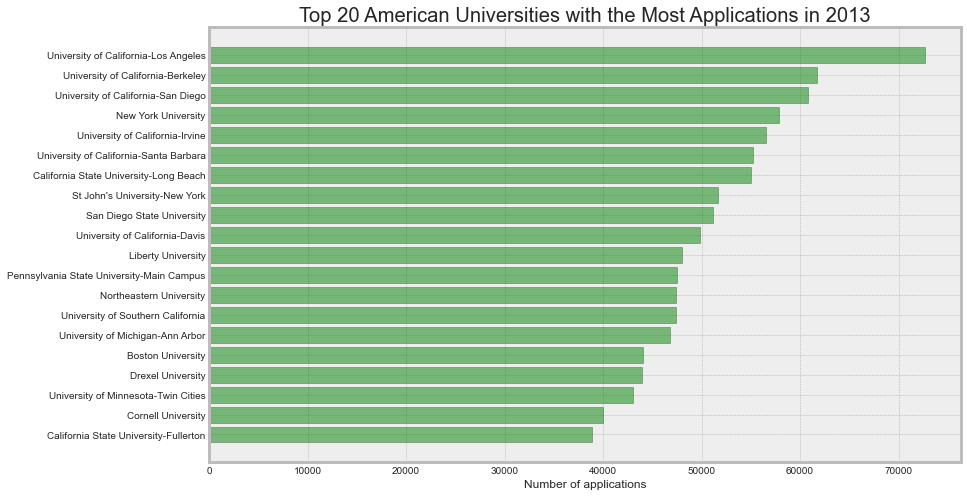

In [55]:
%matplotlib inline

fig, axs = plt.subplots(figsize=(12,8))

x = high_app_df['applicants_total']
unis = high_app_df['name'].to_list()

y_pos = np.arange(len(unis))
mpl.rcParams['font.size']=14
axs.barh(y_pos, x, color='green', alpha=0.5, edgecolor='black')

plt.yticks(ticks = y_pos, labels=unis)
axs.invert_yaxis()  # labels read top-to-bottom
axs.set_xlabel('Number of applications')
axs.set_title('Top 20 American Universities with the Most Applications in 2013')
plt.show()

California and New York seem to be one of most popular among students.
However, one student can send several applications at the same time, but only one university can be the preferred one. 
To find out if the universities with the most applications are the preferred ones, let's find some relationships with the number of admissions and enrollments.

Калифорния и Нью-Йорк кажутся одними из самых популярных среди студентов.
Однако один студент может отправить несколько заявок одновременно, но предпочтительным может быть только один университет.
Чтобы выяснить, являются ли университеты с наибольшим количеством заявлений предпочтительными, давайте найдем некоторые отношения с количеством поступивших и зачисленных. 

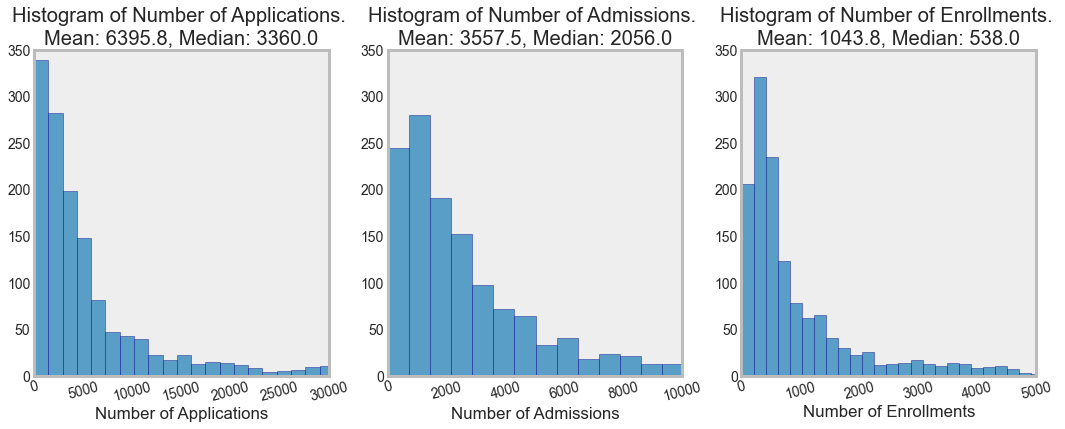

In [56]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
plt.hist(unis_df_copy['applicants_total'],bins=50, edgecolor='darkblue', alpha=0.8)
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(unis_df_copy['applicants_total'].mean(), unis_df_copy['applicants_total'].median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=15)
plt.grid()

plt.subplot(1,3,2)
plt.hist(unis_df_copy['admissions_total'],bins=50, edgecolor='darkblue', alpha=0.8)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(unis_df_copy['admissions_total'].mean(), unis_df_copy['admissions_total'].median()));
plt.xlabel('Number of Admissions')
plt.axis([0,10000,0,350])
plt.xticks(rotation=15)
plt.grid()

plt.subplot(1,3,3)
plt.hist(unis_df_copy['enrolled_total'],bins=50, edgecolor='darkblue', alpha=0.8)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(unis_df_copy['enrolled_total'].mean(), unis_df_copy['enrolled_total'].median()));
plt.xlabel('Number of Enrollments')
plt.axis([0,5000,0,350])
plt.xticks(rotation=15)
plt.grid()

As we can see, the majority of universities received less than 5000 applications in 2013. However, some universities received a much higher number of applications, 
as many as 30000 applications in the same year.

We also can see that the average number of admissions is much lower than that of applications. The majority of universities admitted to less than 2000 students in 2013; 
however, some other universities presented a much higher number of admissions, more than 10000 admissions. As a high rate of admissions could represent a high possibility to be accepted, we could ask: Do students prefer universities with a high rate of admission?

Talking about enrollments, we'll find lower numbers when compared to the number of applications and admissions. That happens because students usually apply to several universities 
at the same time, hoping that the favorite one admits them; however, when that is not the case, they still have other options.

For now, we have two closely-related questions:

Q. Do students prefer universities with high number of applications?
Q. Do students prefer universities with high admission rate?

Как мы видим, в 2013 г. в большинство вузов поступило менее 5000 заявок. Однако в некоторые вузы поступило гораздо большее количество заявок, до 30000 заявок в том же году.

Мы также видим, что среднее количество поступлений намного ниже, чем количество заявлений. В 2013 г. большинство университетов приняли менее 2000 студентов;
однако некоторые другие университеты представили гораздо большее количество приемных, более 10000 приемов. Поскольку высокий уровень приема может означать высокую вероятность быть принятым, мы можем задать вопрос: предпочитают ли студенты университеты с высоким уровнем приема?

Говоря о зачислении, мы обнаружим более низкие цифры по сравнению с количеством заявлений и поступлений. Это происходит потому, что студенты обычно подают документы в несколько университетов.
при этом надеясь, что любимый их признает; однако, когда это не так, у них все еще есть другие варианты.

На данный момент у нас есть два тесно связанных вопроса:

В. Предпочитают ли студенты университеты с большим количеством заявлений?
В. Предпочитают ли студенты университеты с высоким уровнем поступления? 

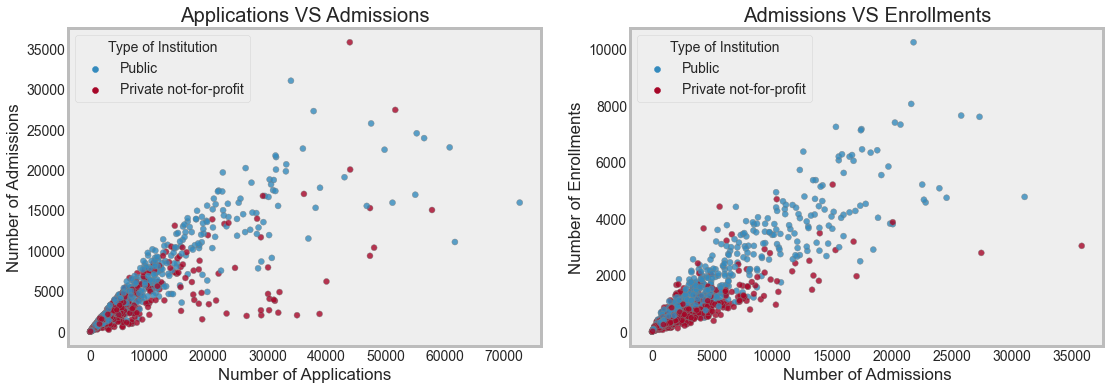

In [57]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Applications VS Admissions')
# control = {'Public' : 'blue', 'Private not-for-profit' : 'orange'}
# plt.scatter(unis_df_copy['applicants_total'], unis_df_copy['admissions_total'], c=unis_df_copy['control_of_institution'].map(control), alpha=0.6)
sns.scatterplot(y=unis_df_copy.admissions_total,x=unis_df_copy.applicants_total,hue=unis_df_copy.control_of_institution, edgecolor='grey', alpha=0.8)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
# labels = unis_df_copy['control_of_institution'].unique().tolist()
plt.legend(loc="upper left", title="Type of Institution")
plt.grid()

plt.subplot(1,2,2)
plt.title('Admissions VS Enrollments')
# control = {'Public' : 'blue', 'Private not-for-profit' : 'orange'}
# plt.scatter(unis_df_copy['admissions_total'], unis_df_copy['enrolled_total'], c=unis_df_copy['control_of_institution'].map(control), alpha=0.6)
sns.scatterplot(x='admissions_total',y='enrolled_total',data=unis_df_copy,hue='control_of_institution', edgecolor='grey', alpha=0.8)
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.legend(loc="upper left", title="Type of Institution")
plt.grid()

plt.tight_layout(pad=2)

From the left scatterplot, it can be observed that most universities with high number of applications also have a high rate of admissions, and vice versa. 
However, there are a few private universities with high number of applications which admit only a few, ie acceptance rate is low making the university selective.

From the second scatterplot, it can be observed that with higher the number of admissions, the enrollment rate is also higher. 
It could be even more meaningful if we try to compare admissions/acceptance rate and enrollment rate. Let's find the admission and enrollment rate for universities.

Из графика слева видно, что большинство университетов с большим количеством заявлений также имеют высокий уровень приема, и наоборот.
Тем не менее, есть несколько частных университетов с большим количеством заявлений, которые принимают только несколько человек, т.е. уровень приема низок, что делает университет избирательным.

На втором графике видно, что чем выше число поступивших, тем выше уровень зачисления.
Это могло бы быть еще более значимым, если бы мы попытались сравнить уровень поступления/зачисления и уровень зачисления. Найдем коэффициент приема и зачисления в университеты. 

In [51]:
unis_df_copy['acceptance_rate']=(unis_df_copy['admissions_total']/unis_df_copy['applicants_total']*100).round(2)
unis_df_copy['enrollment_rate']=(unis_df_copy['enrolled_total']/unis_df_copy['admissions_total']*100).round(2)

<ipython-input-51-5722f860ffa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unis_df_copy['acceptance_rate']=(unis_df_copy['admissions_total']/unis_df_copy['applicants_total']*100).round(2)
<ipython-input-51-5722f860ffa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unis_df_copy['enrollment_rate']=(unis_df_copy['enrolled_total']/unis_df_copy['admissions_total']*100).round(2)


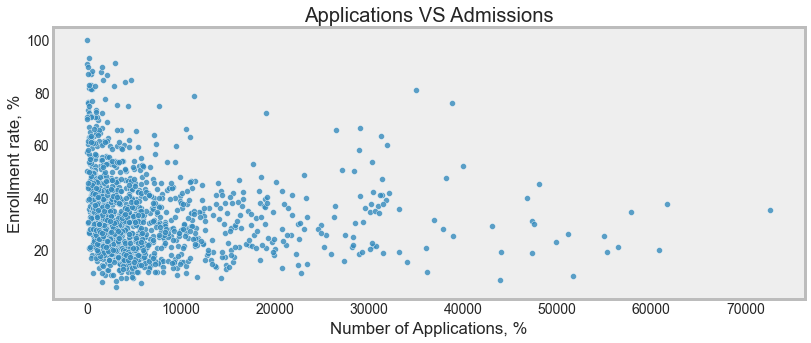

In [58]:
plt.figure(figsize=(12,5))
plt.title('Applications VS Admissions')
# control = {'Public' : 'blue', 'Private not-for-profit' : 'orange'}
# plt.scatter(unis_df_copy['acceptance_rate'], unis_df_copy['enrollment_rate'], c=unis_df_copy['control_of_institution'].map(control), alpha=0.6)
sns.scatterplot(x='applicants_total', y='enrollment_rate', data = unis_df_copy, edgecolor='white', alpha=0.8)
plt.ylabel('Enrollment rate, %')
plt.xlabel('Number of Applications, %')
plt.grid()

This figure shows that the universities which receive a lower number of applications are the ones with a higher enrollment rate. 
Obviously, there are some exceptions, but this is the strongest tendency. Consequently, we can say that a high number of applications does not mean that a university is preferred among students.

Now, let's answer the inquiry about the number of admissions.

На этом графике показано, что университеты, которые получают меньше заявлений, имеют более высокий уровень зачисления.
Очевидно, есть некоторые исключения, но это самая сильная тенденция. Следовательно, можно сказать, что большое количество заявок не означает предпочтения вуза среди студентов.

Теперь давайте ответим на запрос об уровне приема в университеты. 

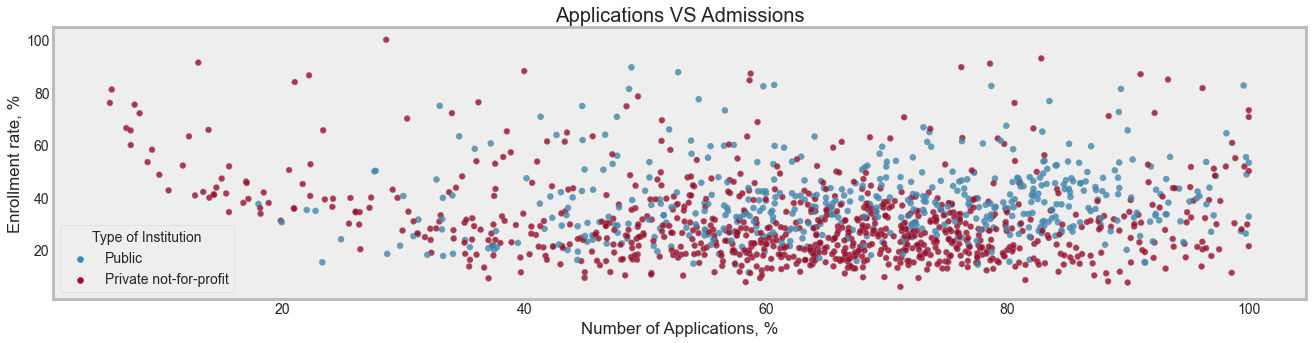

In [61]:
plt.figure(figsize=(20,5))
plt.title('Applications VS Admissions')
sns.scatterplot(x='acceptance_rate', y='enrollment_rate', data = unis_df_copy, edgecolor='grey', alpha=0.8, hue=unis_df_copy['control_of_institution'])
plt.legend(loc='lower left', title='Type of Institution')
plt.ylabel('Enrollment rate, %')
plt.xlabel('Number of Applications, %')
plt.grid()

We can see that for high acceptance rates, the enrollments vary throughout. That leads to a thinkning that acceptance rate is not a factor 
that strongly influences the student's preference for choosing an university. But, we also see that fow low acceptance rates, the enrollment rate is mostly above 40% 
and most of the universities in this bracket are private universities. We can come to a conclusion that most of the public colleges' acceptance rate is more than 50%. 
We also observe that when students are accepted to universities with low acceptance rate, they enroll straightforwadly. Let's analyze this further.

Мы видим, что при высоких показателях зачисления количество зачислений варьируется. Из этого можно заключить, что скорость принятия не является фактором
который сильно влияет на предпочтения студента при выборе вуза. Но мы также видим, что из-за низких показателей принятия, уровень зачисления в основном превышает 40%
и большинство университетов в этой группе являются частными университетами. Можно сделать вывод, что процент приема в большинство государственных колледжей превышает 50%.
Мы также наблюдаем, что когда студентов принимают в университеты с низким уровнем приема, они зачисляются сразу же. Давайте посмотрим на это подбробнее.

In [63]:
high_acceptance=unis_df_copy[unis_df_copy['acceptance_rate'].notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)
low_acceptance=unis_df_copy[unis_df_copy['acceptance_rate'].notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)

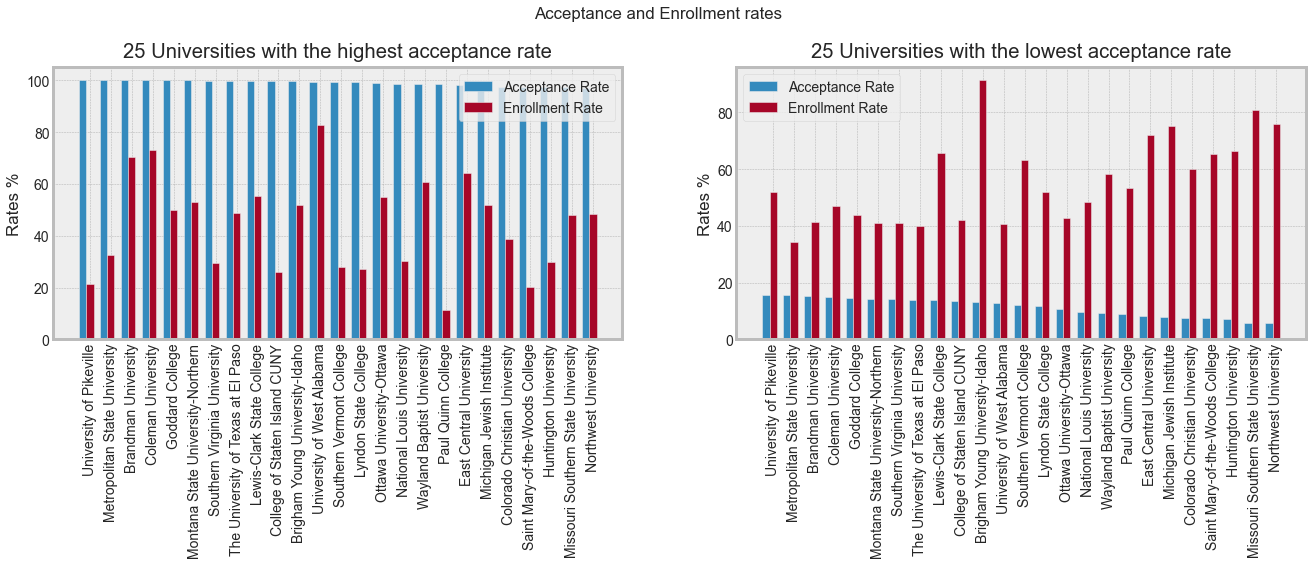

In [65]:
y1 = high_acceptance
y2 = low_acceptance

plt.figure(figsize=(20,5))
plt.suptitle('Acceptance and Enrollment rates', y=1.05)

plt.subplot(1,2,1)

ids = np.arange(len(high_acceptance))
width = 0.35

plt.bar(ids, y1['acceptance_rate'], width, label='Acceptance Rate')
plt.bar(ids+width, y1['enrollment_rate'], width, label='Enrollment Rate')
plt.legend(loc='best')
plt.title('25 Universities with the highest acceptance rate', pad=10)
plt.ylabel('Rates %')
plt.xticks(ids + width,high_acceptance['name'],rotation=90)

plt.subplot(1,2,2)

ids = np.arange(len(low_acceptance))
width = 0.35

plt.bar(ids, y2['acceptance_rate'], width, label='Acceptance Rate')
plt.bar(ids+width, y2['enrollment_rate'], width, label='Enrollment Rate')
plt.legend(loc='best')
plt.title('25 Universities with the lowest acceptance rate', pad=10)
plt.ylabel('Rates %')
plt.xticks(ids + width,high_acceptance['name'],rotation=90)
plt.show()

We see that there is no clear pattern of enrollmenr rates of universitites having high admission rates.

We can be sure that students' preference is not based on how easy it is for them to to be admitted.

Next, let's see if students prefer public or private universities?

Мы видим, что нет четкой закономерности показателей зачисления в университеты с высокими показателями приема.

Мы можем быть уверены, что предпочтения студентов не основаны на том, насколько легко им поступить.

Далее, давайте посмотрим, предпочитают ли студенты государственные или частные университеты? 

spliting the number of applications according to the type of control: private or public.

разбивка количества заявлений по типу управления: частный или государственный. 

In [66]:
unis_private_df=unis_df_copy[unis_df_copy['control_of_institution']=='Private not-for-profit']
unis_private_df=unis_private_df[unis_private_df.applicants_total.notnull()]

unis_public_df=unis_df_copy[unis_df_copy['control_of_institution']=='Public']
unis_public_df=unis_public_df[unis_public_df.applicants_total.notnull()]

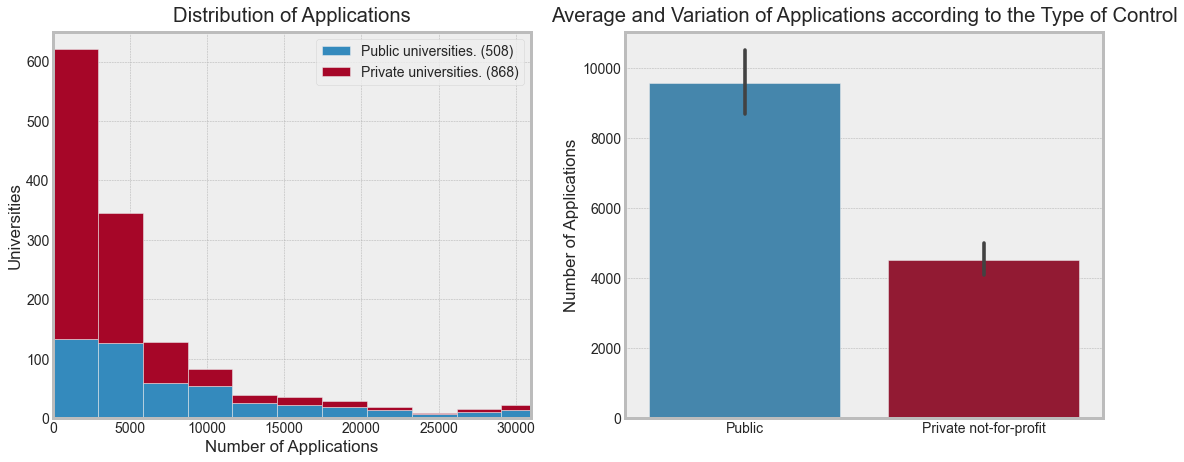

In [68]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

plt.hist([unis_public_df['applicants_total'],unis_private_df['applicants_total']],stacked=True,bins=25)
plt.axis([0,31000,0,650])
plt.title('Distribution of Applications', pad=10)
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(unis_public_df)),'Private universities. ({})'.format(len(unis_private_df))]);

plt.subplot(1,2,2)

sns.barplot(x=unis_df_copy['control_of_institution'],y=unis_df_copy['applicants_total']);
plt.title('Average and Variation of Applications according to the Type of Control', pad=10)
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=2)

According to these figures, the average of applications that public universities received in 2013 is virtually double the average of applications received by private universities in the same year 
(for public universities: around 9000, for private universities: around 4000). At this point, it's important to highlight that the number of public universities in this dataset is 508 universities; 
whereas, the number of private ones is 868 universities. The right figure shows us that the variation in the number of applications to public universities is much higher than that to private universities. 
But we need to remember that the average for public universities is so much higher than that for private universities.

Before analyzing other features, let's find some interesting data that verifies the last conclusion.

Let's find the max and min values of applications for public and private universities.

Согласно этим цифрам, среднее количество заявлений, полученных в государственных университетах в 2013 г., практически вдвое превышает среднее количество заявлений, полученных частными университетами в том же году.
(для государственных университетов: около 9000, для частных университетов: около 4000). На данный момент важно подчеркнуть, что количество государственных университетов в этом наборе данных составляет 508 университетов;
тогда как количество частных составляет 868 университетов. Правый рисунок показывает нам, что разница в количестве заявок в государственные университеты намного выше, чем в частные университеты.
Но мы должны помнить, что средний показатель для государственных университетов намного выше, чем для частных университетов.

Прежде чем анализировать другие функции, давайте найдем несколько интересных данных, подтверждающих последний вывод.

Найдем максимальное и минимальное количество заявок в государственные и частные университеты. 

In [152]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(unis_private_df['applicants_total'].min()),int(unis_public_df['applicants_total'].min())))

The minimum number of applications for private universities was 4; whereas, for public universities was 193.


In [153]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(unis_private_df['applicants_total'].max()),int(unis_public_df['applicants_total'].max())))

The minimum number of applications for private universities was 57845; whereas, for public universities was 72676.


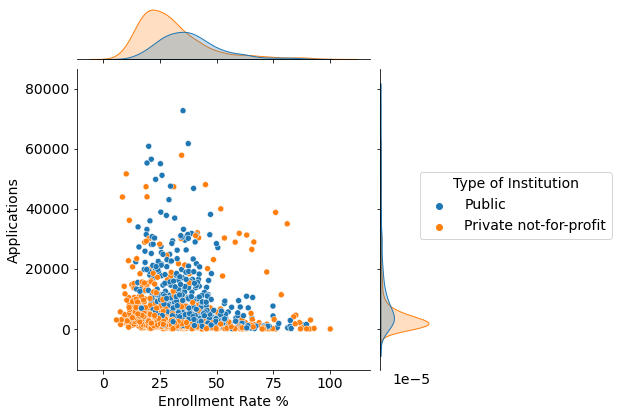

In [179]:
g=sns.jointplot(x=unis_df_copy['enrollment_rate'],y=unis_df_copy['applicants_total'],hue=unis_df_copy['control_of_institution'],height=6);
g.ax_joint.legend_._visible=False
g.fig.legend(bbox_to_anchor=(1.4, 0.6), loc=1, title='Type of Institution')
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

By analyzing the figure above, we can see that the enrollment rate, on average, is higher for public universities than the average for private universities. 
So, if we add this finding to the ones above, we can conclude that, in fact, there is a students' preference for public universities.

Q: Do students prefer universities with low tuition and fees?

Анализируя приведенный выше рисунок, мы видим, что уровень зачисления в государственные университеты в среднем выше, чем в среднем по частным университетам.
Итак, если мы добавим этот вывод к вышеприведенным, мы можем заключить, что на самом деле студенты отдают предпочтение государственным университетам.

Q: Студенты предпочитают университеты с низкой платой за обучение? 

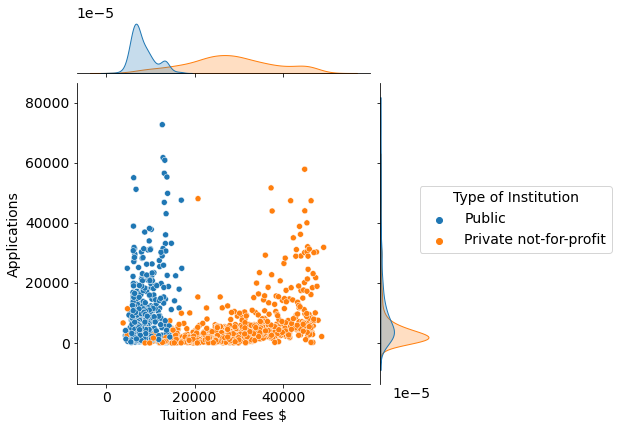

In [176]:
g=sns.jointplot(x=unis_df_copy['tuition_and_fees_2013_14'],y=unis_df_copy['applicants_total'],hue=unis_df_copy['control_of_institution'],height=6);
g.ax_joint.legend_._visible=False
g.fig.legend(bbox_to_anchor=(1.4, 0.6), loc=1, title='Type of Institution')
g=(g.set_axis_labels("Tuition and Fees $","Applications"));

Looking at the figure above, we find that the most affordable universities receive the highest number of applications. This could make us think that there could be a relationship between the tuition 
and fees and the students' preference; however, we could endeavor to find a definite conclusion by analyzing tuition and fees and enrollment rates.

Глядя на рисунок выше, мы видим, что самые доступные университеты получают наибольшее количество заявлений. Это может заставить нас думать, что может быть связь между обучением
и сборы и предпочтения студентов; тем не менее, мы могли бы попытаться сделать определенный вывод, проанализировав плату за обучение и уровень зачисления. 

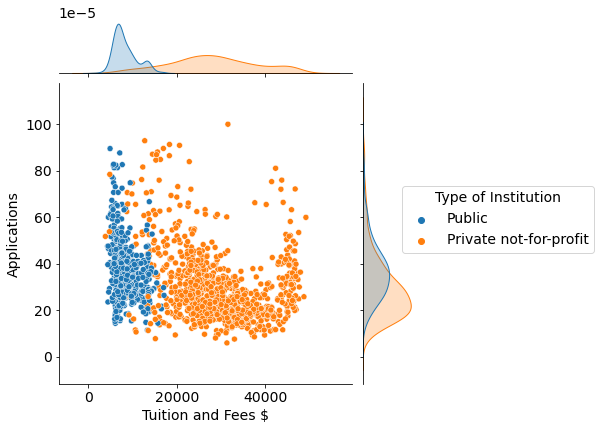

In [177]:
g=sns.jointplot(x=unis_df_copy['tuition_and_fees_2013_14'],y=unis_df_copy['enrollment_rate'],hue=unis_df_copy['control_of_institution'],height=6);
g.ax_joint.legend_._visible=False
g.fig.legend(bbox_to_anchor=(1.4, 0.6), loc=1, title='Type of Institution')
g=(g.set_axis_labels("Tuition and Fees $","Applications"));

This figure shows us two main ideas. The first one is that public universities are more affordable than the majority of private universities. 
Second, there is a higher concentration from the middle to the left. If we look at the enrollment rate in this figure's region, 
we can see that affordable universities have higher enrollment rates than those of the most expensive universities. 
This leads us to think that, when it comes to tuition and fees, students prefer affordable universities. 
Additionally, if we remember the conclusion of the last finding of public universities then, now, we could say that we found the reason or one of the reasons for the students' preference for public universities. 
Public universities are much more affordable than the majority of private universities.

Q: Do students prefer a university for its low cost of on-campus living?.
Many students prefer living out of campus because it gives them other benefits; therefore, some of them do not choose a university for a low cost of on-campus living. 
This consideration should be contemplated in this dataset, but it's not. However, we'll assume that the majority of students do look for living on campus.

This question could be addressed by finding a relationship with the type of university (public or private).

The dataset contains two columns related to the cost of on-campus living. One column displays the cost for in-state students, the other one for out-state students. So, first, we're going to analyze these two costs separately.

На этом рисунке показаны две основные идеи. Во-первых, государственные университеты более доступны по цене, чем большинство частных университетов.
Во-вторых, есть более высокая концентрация от середины к левой стороне. Если мы посмотрим на уровень зачисления в регионе этой цифры,
мы видим, что доступные университеты имеют более высокий уровень зачисления, чем самые дорогие университеты.
Это наводит нас на мысль, что, когда речь идет о плате за обучение, студенты предпочитают недорогие университеты.
Кроме того, если мы помним вывод о последнем обнаружении государственных университетов, то теперь мы можем сказать, что нашли причину или одну из причин предпочтения студентов государственных университетов.
Государственные университеты намного доступнее, чем большинство частных университетов.

В: Предпочитают ли студенты университет из-за низкой стоимости проживания в кампусе?
Многие студенты предпочитают жить за пределами кампуса, потому что это дает им другие преимущества; поэтому некоторые из них выбирают университет не из-за низкой стоимости проживания в кампусе.
Это соображение должно учитываться в этом наборе данных, но это не так. Однако мы предположим, что большинство студентов действительно ищут жилье в кампусе.

Этот вопрос можно решить, найдя связь с типом университета (государственный или частный).

Набор данных содержит два столбца, относящиеся к стоимости проживания в кампусе. В одном столбце отображается стоимость для студентов из штата, в другом — для студентов из других штатов. Итак, во-первых, мы собираемся проанализировать эти две затраты по отдельности. 

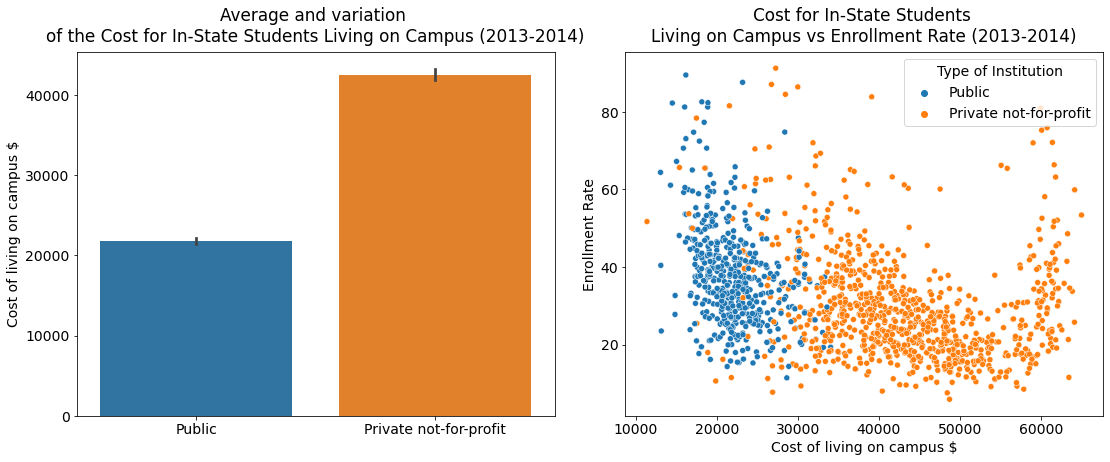

In [189]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

sns.barplot(x=unis_df_copy['control_of_institution'],y=unis_df_copy['total_price_for_in_state_students_living_on_campus_2013_14']);
plt.title('''Average and variation 
of the Cost for In-State Students Living on Campus (2013-2014)''', pad=10)
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.subplot(1,2,2)

sns.scatterplot(x=unis_df_copy['total_price_for_in_state_students_living_on_campus_2013_14'],y=unis_df_copy['enrollment_rate'], hue=unis_df_copy['control_of_institution'])
plt.title('''Cost for In-State Students 
Living on Campus vs Enrollment Rate (2013-2014)''', pad=10)
plt.legend(loc='best', title='Type of Institution')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

The first and most conspicuous insight that these figures show is that the majority of public universities offer a much more affordable cost for in-state students than private universities. 
In fact, the average cost in the case of public universities is half of that in the case of private universities.

Second, the right figure shows that high enrollment rates are more frequent when the cost is more affordable. This leads us to think that students, indeed, look for universities 
that offer an affordable cost of living on campus for in-state students.

Первый и наиболее заметный вывод, который показывают эти цифры, заключается в том, что большинство государственных университетов предлагают гораздо более доступные цены для студентов в штатах, чем частные университеты.
На самом деле, средняя стоимость обучения в государственных университетах вдвое меньше, чем в частных университетах.

Во-вторых, правый рисунок показывает, что высокие показатели зачисления более часты, когда стоимость более доступна. Это наводит нас на мысль, что студенты действительно ищут университеты
которые предлагают доступную стоимость проживания в кампусе для студентов штата. 

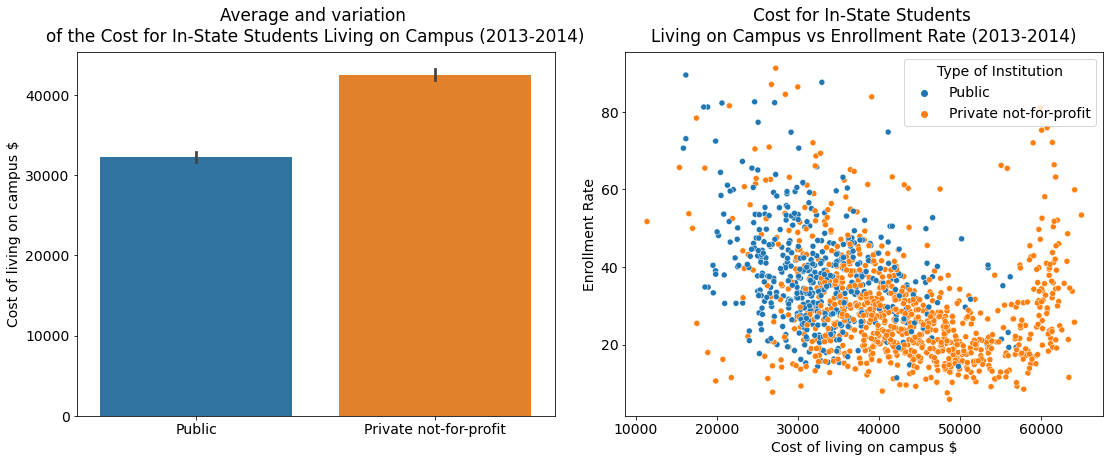

In [192]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

sns.barplot(x=unis_df_copy['control_of_institution'],y=unis_df_copy['total_price_for_out_of_state_students_living_on_campus_2013_14']);
plt.title('''Average and variation 
of the Cost for Out-State Students Living on Campus (2013-2014)''', pad=10)
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.subplot(1,2,2)

sns.scatterplot(x=unis_df_copy['total_price_for_out_of_state_students_living_on_campus_2013_14'],y=unis_df_copy['enrollment_rate'], hue=unis_df_copy['control_of_institution'])
plt.title('''Cost for Out-State Students 
Living on Campus vs Enrollment Rate (2013-2014)''', pad=10)
plt.legend(loc='best', title='Type of Institution')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')
plt.tight_layout(pad=2)

In the case of out-state students, the average cost in the case of public universities is, again, lower than that of private universities.

Additionally, for out-state students, we find a similar pattern as in the case of in-state students: high enrollment rates are more frequent among affordable costs. 
Therefore, students prefer universities that offer an affordable cost of living on campus for out-state students.

Что касается студентов из других штатов, то средняя стоимость обучения в государственных университетах, опять же, ниже, чем в частных университетах.

Кроме того, для студентов из других штатов мы обнаруживаем ту же закономерность, что и для студентов из штатов: высокие показатели зачисления чаще встречаются среди доступных затрат.
Поэтому студенты предпочитают университеты, которые предлагают доступную стоимость проживания в кампусе для студентов из других штатов. 

As a final feature, we could think about future academic opportunities that could lead students to choose a university. Currently, there are many types of degrees that universities offer.

В заключение мы могли бы подумать о будущих академических возможностях, которые могли бы привести студентов к выбору университета. В настоящее время существует множество типов степеней, которые предлагают университеты. 

In [194]:
names = unis_df_copy.columns[unis_df_copy.columns.str.startswith('offers')].values
degree=unis_df_copy[unis_df_copy[names]=='Yes'][names].count().sort_values(ascending=False)

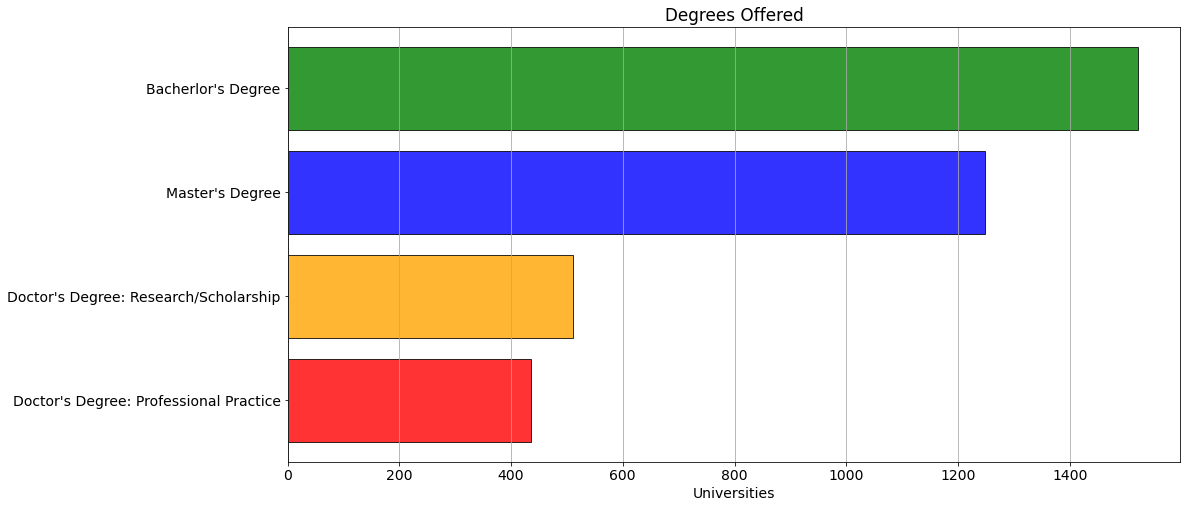

In [235]:
fig, axs = plt.subplots(figsize=(16,8))

x = degree
y = degree.index

mpl.rcParams['font.size']=14
axs.barh(y,x, color=['green','blue','orange','red'], alpha=0.8, edgecolor='black')

plt.yticks(ticks = y, labels=["Bacherlor's Degree","Master's Degree",
                    "Doctor's Degree: Research/Scholarship",
                    "Doctor's Degree: Professional Practice"])
axs.invert_yaxis()  # labels read top-to-bottom
axs.set_xlabel('Universities')
axs.set_title('Degrees Offered')
plt.grid(axis='x', color='darkgrey')

Q: Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?
    
Q: Студенты предпочитают университет, исходя из возможности получения более высокой, дополнительной ученой степени в том же университете? 

In [206]:
hg_degree = unis_df_copy['highest_degree_offered'].values_counts()

Text(0.5, 1.0, 'Highest Degree Offered')

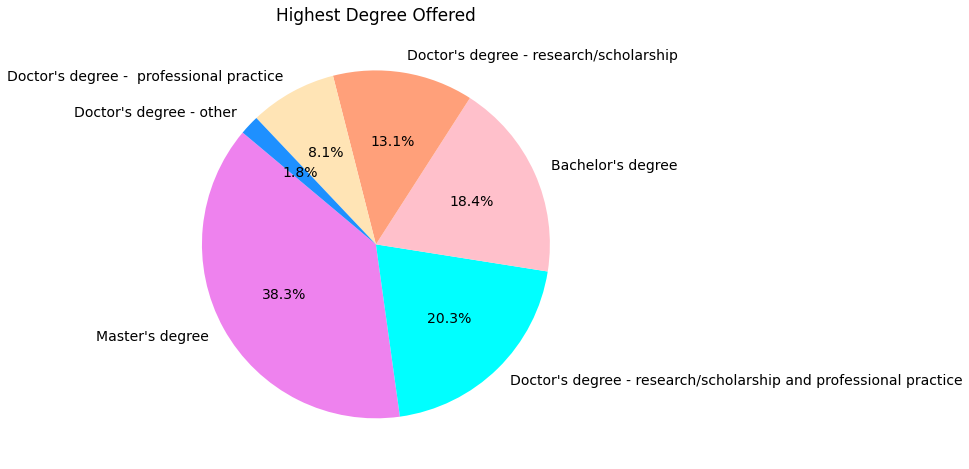

In [208]:
plt.figure(figsize=(16,8))

plt.pie(hg_degree, labels=hg_degree.index, autopct='%.1f%%', startangle=140, colors=['violet','aqua','pink','lightsalmon','moccasin','dodgerblue'])
plt.title('Highest Degree Offered')
plot.show()

Q: Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?
    
Q: Студенты предпочитают университет, исходя из возможности получения более высокой, дополнительной ученой степени в том же университете? 

<ipython-input-238-443d7fbb87cf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('''Doctor's Degree: Research/Scholarship''',


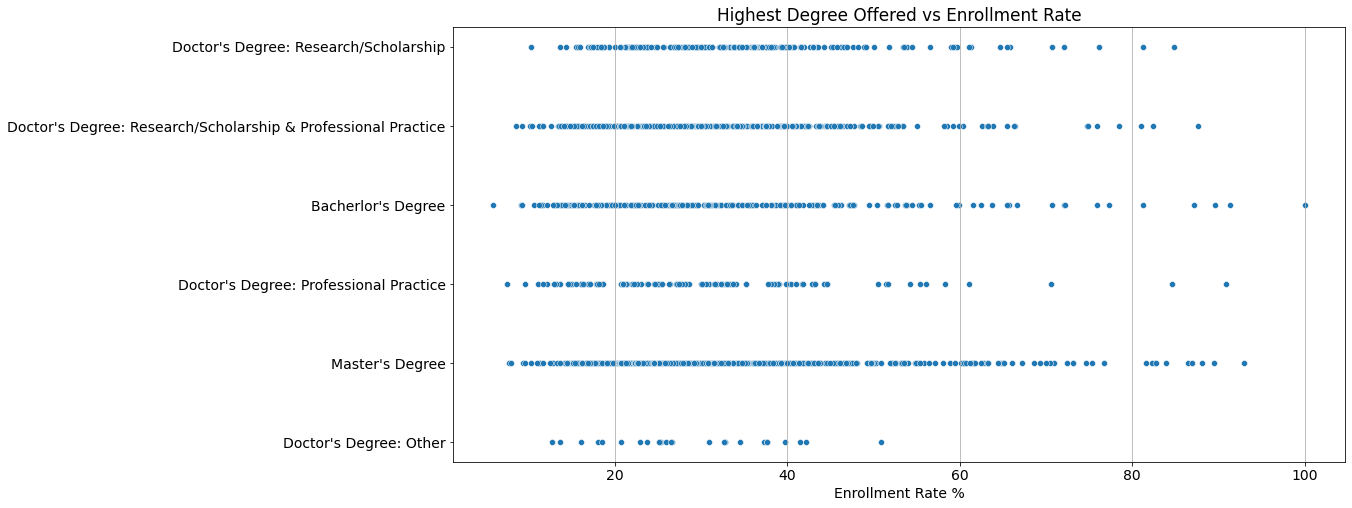

In [238]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='highest_degree_offered',x='enrollment_rate',data=unis_df_copy);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree: Research/Scholarship''',
                    '''Doctor's Degree: Research/Scholarship & Professional Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));

There are several Doctor's degrees offered, and even though we join them, still, the trend is that, more frequently, universities that offer up to a Bachelor's degree or a Master's degree have high enrollment rates. 
Therefore, we could think that students do not necessarily look for a university thinking about the possibility of continuing a next degree in the same university.

Предлагается несколько докторских степеней, и хотя мы присоединяемся к ним, тем не менее, тенденция такова, что чаще университеты, которые предлагают степень бакалавра или магистра, имеют высокие показатели зачисления.
Таким образом, мы могли бы подумать, что студенты не обязательно ищут университет, думая о возможности продолжения обучения в том же университете. 